Representacion de la tabla quoridor que se va usar para la experimentacion de los algoritmos.

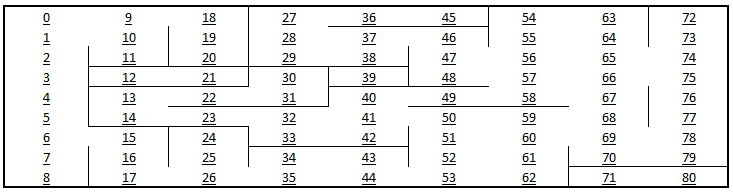

Se va a representrar la tabla anterior mediante una lista de adyacencia. Ademas, se elejira el punto de partida del jugador y los estados objetivos.

In [ ]:
import heapq as hq
import math
import time
from queue import PriorityQueue

G = [
[(1, 1), (9, 1)],
[(0, 1), (2, 1), (10, 1)],
[(1, 1), (3, 1)],
[(2, 1), (4, 1)],
[(3, 1), (5, 1)],
[(4, 1), (6, 1)],
[(5, 1), (7, 1), (15, 1)],
[(6, 1), (8, 1)],
[(7, 1)],
[(0, 1), (10, 1), (18, 1)],
[(1, 1), (9, 1), (11, 1)],
[(10, 1)],
[(21, 1)],
[(14, 1), (22, 1)],
[(13, 1), (23, 1)],
[(6, 1), (16, 1)],
[(15, 1), (17, 1)],
[(16, 1), (26, 1)],
[(9, 1), (19, 1)],
[(18,1), (20, 1)],
[(19, 1)],
[(12, 1)],
[(13, 1), (31, 1)],
[(14, 1), (32, 1)],
[(25, 1)],
[(24, 1), (26, 1)],
[(17, 1), (25, 1), (35, 1)],
[(28, 1), (36, 1)],
[(27, 1), (29, 1), (37, 1)],
[(28, 1), (38, 1)],
[(31, 1)],
[(22, 1)],
[(23, 1), (33, 1), (41, 1)],
[(32, 1), (42, 1)],
[(35, 1), (43, 1)],
[(26, 1), (34, 1), (44, 1)],
[(27, 1), (45, 1)],
[(28, 1), (38, 1), (46, 1)],
[(29, 1), (37, 1)],
[],
[(41, 1), (49, 1)],
[(32, 1), (40, 1), (42, 1), (50, 1)],
[(33, 1), (41, 1)],
[(34, 1), (44, 1)],
[(35, 1), (43, 1), (53, 1)],
[(36, 1)],
[(37, 1), (47, 1)],
[(46, 1), (48, 1), (56, 1)],
[(47, 1), (57, 1)],
[(40, 1), (58, 1)],
[(41, 1), (51, 1), (59, 1)],
[(50, 1), (52, 1), (60, 1)],
[(51, 1), (53, 1), (61, 1)],
[(44, 1), (52, 1), (62, 1)],
[(55, 1), (63, 1)],
[(54, 1), (56, 1), (64, 1)],
[(47, 1), (55, 1), (57, 1), (65, 1)],
[(48, 1), (56, 1), (58, 1), (66, 1)],
[(49, 1), (57, 1), (67, 1)],
[(50, 1), (60, 1), (68, 1)],
[(51, 1), (59, 1), (61, 1), (69, 1)],
[(52, 1), (60, 1), (62, 1)],
[(53, 1), (61, 1)],
[(54, 1), (64, 1)],
[(55, 1), (63, 1), (65, 1)],
[(56, 1), (64, 1), (66, 1), (74, 1)],
[(57, 1), (65, 1), (67, 1), (75, 1)],
[(58, 1), (66, 1), (68, 1)],
[(59, 1), (67, 1), (69, 1)],
[(60, 1), (68, 1), (70, 1), (78, 1)],
[(69, 1), (79, 1)],
[(80, 1)],
[(73, 1)],
[(72, 1), (74, 1)],
[(65, 1), (73, 1), (75, 1)],
[(66, 1), (74, 1), (76, 1)],
[(75, 1), (77, 1)],
[(76, 1), (78, 1)],
[(69, 1), (77, 1), (79, 1)],
[(70, 1), (78, 1)],
[(71, 1)]
]

goals = [72,73,74,75,76,77,78,79,80]
inicio = 20



La primera implentacion para resolver el juego es la busqueda de costo uniforme (UCS).

In [ ]:
# Algoritmo UCS ----------------------------------------------
def busquedaCostoUniforme(G, s, t): #G es el grafo, s es el nodo inicial y t el final
    n=len(G)
    visitados=[False]*n
    pesos=[math.inf]*n
    ruta=[None]*n
    cola=[] #de frontera
    hq.heappush(cola, (0,s))
    pesos[s]=0
    while len(cola)>0:
        g, u = hq.heappop(cola)
        if visitados[u]:
            continue
        if u==t:
            break
        visitados[u]=True
        for v, w in G[u]:
            f=g+w
            if f<pesos[v]:
                pesos[v]=f
                ruta[v]=u
                hq.heappush(cola,(f,v)) #encolar
    return ruta, pesos


t1=time.time()

rutas = []
pesos = []
for objetivo in goals:
    ruta, peso = busquedaCostoUniforme(G, inicio, objetivo)
    temp_ruta = []
    while objetivo!=None:
        temp_ruta.append(objetivo)
        objetivo=ruta[objetivo]
    rutas.append(temp_ruta)
    if len(temp_ruta) > 1:
        pesos.append(len(temp_ruta))
    else: pesos.append(math.inf)
    
temp_ucs = 0
for i in pesos:
    if i == min(pesos):
        break
    temp_ucs+=1

t11=time.time()
tiempo_1 = t11-t1

print("ruta optima: ", rutas[temp_ucs])
# ---------------------------------------------- fin



Segungo algorimto para resilver el juego es Dijktra.

In [ ]:

# Algoritmo Dijkstra ----------------------------------------------
def Dijkstra(G, s):
  n=len(G)
  visitados=[False]*n
  pesos=[math.inf for _ in range(n)]
  path=[None]*n
  colap=[]
  pesos[s]=0
  hq.heappush(colap,(0,s))
  while len(colap)>0:
    g,u=hq.heappop(colap)
    visitados[u]=True
    for v, w in G[u]:
      if not visitados[v]:
        f=g+w
        if f<pesos[v]:
          pesos[v]=f
          path[v]=u
          hq.heappush(colap, (f,v))
  return path, pesos

distancias_goals = []

def imprimirCamino(path, pesos, f, F):
    if f!=None:
      imprimirCamino(path, pesos, path[f], F)
      print (f, end=' ')
    else:
      print(pesos[F], '-->', end=' ')
      distancias_goals.append(pesos[F])


t2=time.time()

caminos, distancias=Dijkstra(G,inicio)
for n in goals:
  imprimirCamino(caminos, distancias, n, n)
  print()

cont=0
for i in distancias_goals:
    if i == min(distancias_goals):
        break
    cont+=1


print("Dijktra recorrido optimo: ")
imprimirCamino(caminos, distancias, goals[cont], goals[cont])

t22=time.time()
tiempo_2 = t22-t2

# ---------------------------------------------- fin




Finlmente comparamos los tiempos que tardaron en resolver el juego.

In [ ]:

# Analisis de tiempo ---------------------------
print()
print("UCS tiempo: ", tiempo_1)
print("Dijktra tiempo: ", tiempo_2)
# ---------------------------------------------- fin